 # Тестовое задание

В таблице searches записаны действия пользователей в аб эксперименте, таблица содержит следующие поля:
- experiment_group - группа (тест или контроль)
- ts (время)
- request_id (id запроса)
- referrer_request_id (id выдачи)
- user_id (id пользователя)
- path (путь к странице)

Пример sql запроса ниже, число уникальных пользователей

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
import sqlite3

con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("SELECT COUNT(DISTINCT user_id) FROM searches")
print(cur.fetchall())
con.close()

[(53821,)]


Необходимо реализовать на sql две метрики:
- среднее кол-во кликов на пользователя (0 – валидное значение)
- среднее время до первого клика после поиска

Построить гистограммы значений метрик для пользователей в контроле и эксперименты

Сравнить перцентили метрик в контроле и эксперименте

Воспользоваться стат-тестом, чтобы проверить проверить гипотезы (уровень значимости 0.05) о том, что среднее значение метрик в эксперименте не меняется

In [2]:

con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select avg(tt.t),  avg(cc.t) from ( SELECT count(request_id) as t from searches where experiment_group = 'test' GROUP by user_id) as  tt, (SELECT count(request_id) as t from searches where experiment_group = 'control' GROUP by user_id) as  cc ")
print(cur.fetchall())
con.close()

[(10.260410799444257, 12.619065131845096)]


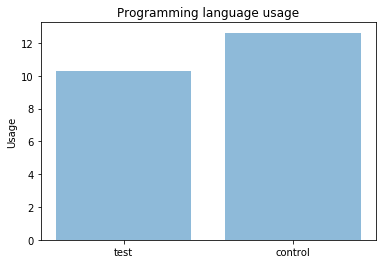

In [27]:
objects = ('test', 'control')
y_pos = np.arange(len(objects))
x = [10.260410799444257,12.619065131845096 ]
plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [3]:

con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select avg(cc.t - tt.t ) from (select ts t from searches where path like '/search/vacancy' and experiment_group = 'control' group by user_id) tt, (select ts t from searches where path like '/analytics_source/vacancy/%' and experiment_group = 'control' group by user_id) cc")
print(cur.fetchall())
con.close()

[(797279.2929896082,)]


In [70]:
con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select (cc.t - tt.t) t1, tt.m from \
(select ts t, user_id m from searches where path like '/search/vacancy' and experiment_group = 'control' group by user_id) tt, \
(select ts t, user_id m from searches where path like '/analytics_source/vacancy/%' and experiment_group = 'control' group by user_id) cc \
 ") 
print(cur.fetchall())
con.close()

MemoryError: 

In [5]:
con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select avg(cc.t - tt.t) t1 from \
(select ts t from searches where path like '/search/vacancy' and experiment_group = 'test' group by user_id) tt, \
(select ts t from searches where path like '/analytics_source/vacancy/%' and  experiment_group = 'test' group by user_id) cc") 
print(cur.fetchall())
con.close()

[(1089938.350498145,)]


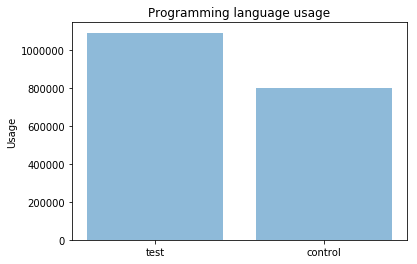

In [28]:
objects = ('test', 'control')
y_pos = np.arange(len(objects))
x = [1089938.350498145,797279.2929896082 ]
plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [73]:
con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select mm.m FROM( \
select avg(tt.t) as m, tt.user_id from \
(SELECT DISTINCT count( DISTINCT request_id) as t, user_id  from searches \
            where experiment_group = 'test' GROUP by user_id) as tt \
GROUP BY  tt.user_id) as mm")


rows_x = cur.fetchall()

res_list_x = [x[0] for x in rows_x]

In [74]:
con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select mm.u FROM( \
select avg(tt.t) as m, tt.user_id as u from \
(SELECT DISTINCT count( DISTINCT request_id) as t, user_id  from searches \
            where experiment_group = 'test' GROUP by user_id) as tt \
GROUP BY  tt.user_id) as mm")

rows_y = cur.fetchall()

res_list_y = [y1[0] for y1 in rows_y]

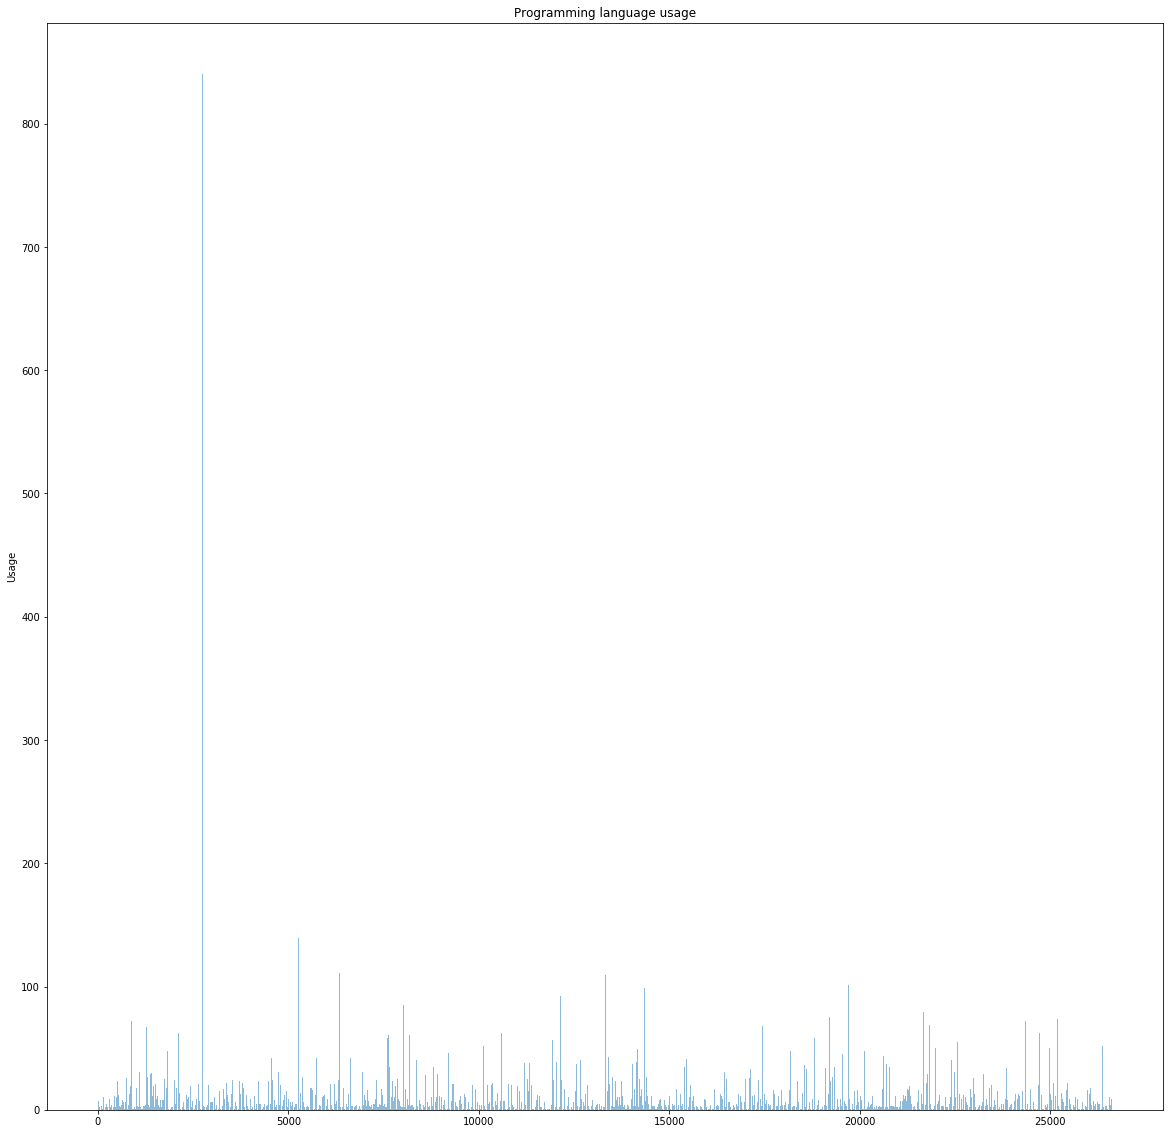

In [75]:

y_pos = np.arange(len(res_list_y))
plt.figure(figsize=(20,20))
plt.bar(y_pos, res_list_x, align='center', alpha=0.5)
#plt.xticks(y_pos, res_list_y)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [80]:
con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select mm.m FROM( \
select avg(tt.t) as m, tt.user_id from \
(SELECT DISTINCT count( DISTINCT request_id) as t, user_id  from searches \
            where experiment_group = 'control' GROUP by user_id) as tt \
GROUP BY  tt.user_id) as mm")


rows_x1 = cur.fetchall()

res_list_x1 = [x1[0] for x1 in rows_x1]
print(res_list_x1)

[34.0, 3.0, 19.0, 3.0, 6.0, 4.0, 2.0, 2.0, 11.0, 62.0, 14.0, 3.0, 13.0, 2.0, 6.0, 1.0, 1.0, 13.0, 36.0, 3.0, 24.0, 6.0, 7.0, 20.0, 1.0, 168.0, 9.0, 14.0, 66.0, 10.0, 9.0, 5.0, 1.0, 77.0, 6.0, 16.0, 10.0, 17.0, 2.0, 3.0, 5.0, 8.0, 12.0, 1.0, 2.0, 1.0, 1.0, 8.0, 5.0, 12.0, 4.0, 5.0, 1.0, 13.0, 7.0, 10.0, 5.0, 23.0, 1.0, 5.0, 10.0, 1.0, 2.0, 7.0, 1.0, 13.0, 5.0, 2.0, 1.0, 2.0, 6.0, 2.0, 32.0, 2.0, 1.0, 87.0, 2.0, 6.0, 4.0, 14.0, 8.0, 13.0, 11.0, 4.0, 1.0, 5.0, 3.0, 6.0, 23.0, 5.0, 3.0, 1.0, 14.0, 8.0, 1.0, 1.0, 32.0, 15.0, 13.0, 13.0, 1.0, 4.0, 12.0, 13.0, 1.0, 2.0, 6.0, 6.0, 6.0, 26.0, 7.0, 2.0, 11.0, 2.0, 2.0, 13.0, 39.0, 3.0, 2.0, 11.0, 5.0, 4.0, 1.0, 2.0, 1.0, 6.0, 6.0, 7.0, 11.0, 1.0, 7.0, 1.0, 75.0, 3.0, 7.0, 6.0, 2.0, 17.0, 11.0, 10.0, 8.0, 5.0, 2.0, 10.0, 10.0, 6.0, 8.0, 1.0, 35.0, 92.0, 2.0, 20.0, 2.0, 20.0, 11.0, 4.0, 2.0, 8.0, 2.0, 1.0, 1.0, 2.0, 21.0, 18.0, 1.0, 9.0, 4.0, 5.0, 10.0, 8.0, 59.0, 1.0, 7.0, 72.0, 8.0, 2.0, 53.0, 1.0, 1.0, 5.0, 10.0, 28.0, 1.0, 1.0, 15.0, 15.0, 10.

In [79]:
con = sqlite3.connect("analyst_hometask.db")
cur = con.cursor()
cur.execute("select mm.u FROM( \
select avg(tt.t) as m, tt.user_id as u from \
(SELECT DISTINCT count( DISTINCT request_id) as t, user_id  from searches \
            where experiment_group = 'control' GROUP by user_id) as tt \
GROUP BY  tt.user_id) as mm")

rows_y1 = cur.fetchall()

res_list_y1 = [y1[0] for y1 in rows_y1]
print(res_list_y1)

[254243, 597501, 623948, 754253, 828228, 1245073, 1284078, 1572608, 1648960, 2004682, 2015316, 2038204, 2040841, 2355050, 2755051, 2767783, 3234436, 3491333, 3618577, 3623698, 3694382, 3732158, 3787555, 3856667, 3943377, 4007021, 4375396, 4484646, 4509549, 4569364, 4620707, 4723599, 4827570, 5069585, 5096900, 5100808, 5152014, 5324213, 5487052, 5700194, 5719949, 5811761, 6087521, 6151263, 6729775, 6888828, 6972382, 7102763, 7342419, 7402301, 7622081, 7841475, 7872401, 8068385, 8071723, 8289364, 8567037, 8596606, 8851931, 8868767, 8925057, 8926861, 9154873, 9288169, 9380476, 9422541, 9423229, 9530254, 9667668, 9744999, 9837582, 10101994, 10241852, 10620631, 10736834, 10912723, 11064878, 11095214, 11461082, 11515581, 11599466, 11707515, 12075676, 12078827, 12108121, 12205720, 12386830, 12486513, 12562777, 12930948, 12992000, 13032810, 13066457, 13070022, 13217194, 13378596, 13575737, 13638333, 13939069, 14148759, 14207034, 14511836, 14844974, 15434089, 15465383, 15522686, 15613895, 15694

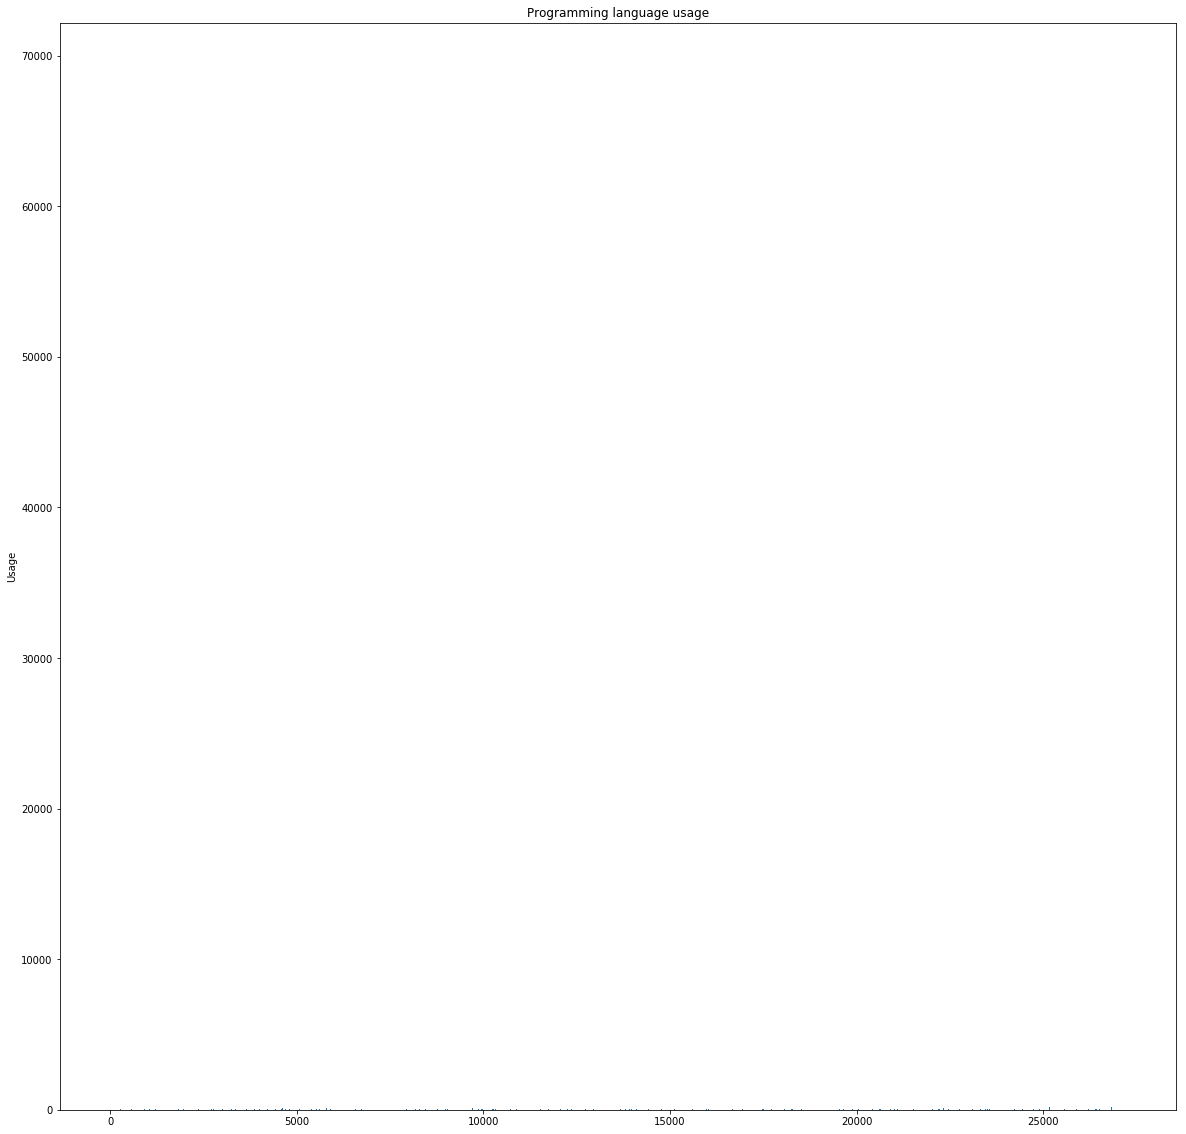

In [82]:

y_pos = np.arange(len(res_list_y1))
plt.figure(figsize=(20,20))
plt.bar(y_pos, res_list_x1)
#plt.xticks(y_pos, res_list_y)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()